## Vectores Autoregresivos

En Data Science, los Vectores Autoregresivos (VAR) son modelos estadísticos que permiten analizar y predecir la evolución de varias variables interdependientes en el tiempo. En lugar de trabajar con una sola variable dependiente, los VAR utilizan múltiples variables para modelar su relación y predecir sus valores futuros. Los VAR son comúnmente utilizados en series de tiempo financieras, económicas y de negocios, y son una herramienta útil para analizar la dinámica de variables como el PIB, el precio de las acciones, las ventas, entre otras.

Para poder trabajar con vectores autoregresivos en Jupyter Notebook, es necesario importar las librerías correspondientes, en este caso utilizaremos la librería "statsmodels" para generar los modelos de vectores autoregresivos.

El siguiente ejercicio tiene como objetivo generar un modelo VAR (Vector Autoregression) utilizando datos de la Bolsa de Valores de Nueva York (NYSE), específicamente se trabajará con los precios de cierre de las acciones de Apple y Microsoft durante los últimos 60 días.

Los pasos a seguir para realizar este ejercicio son los siguientes:

    Importar las librerías necesarias.

    Descargar los datos de los precios de cierre de Apple y Microsoft de los últimos 60 días.

    Generar un gráfico con la serie de tiempo de los precios de cierre de ambas compañías para visualizar su comportamiento.

    Dividir los datos en un conjunto de entrenamiento y otro de prueba.

    Entrenar un modelo VAR utilizando los datos de entrenamiento.

    Realizar pronósticos utilizando el modelo entrenado y los datos de prueba.

    Comparar los pronósticos con los valores reales de los precios de cierre de Apple y Microsoft y visualizar los resultados.

A continuación se muestra el código correspondiente:

In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# Descargar datos
url = 'https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1654521600&period2=1657516800&interval=1d&events=history&includeAdjustedClose=true'
aapl = pd.read_csv(url, index_col='Date', parse_dates=True)[['Close']]
url = 'https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=1654521600&period2=1657516800&interval=1d&events=history&includeAdjustedClose=true'
msft = pd.read_csv(url, index_col='Date', parse_dates=True)[['Close']]

In [4]:
# Combinar datos
prices = pd.concat([aapl, msft], axis=1)
prices.columns = ['AAPL', 'MSFT']

Text(0.5, 1.0, 'Precios de cierre AAPL y MSFT')

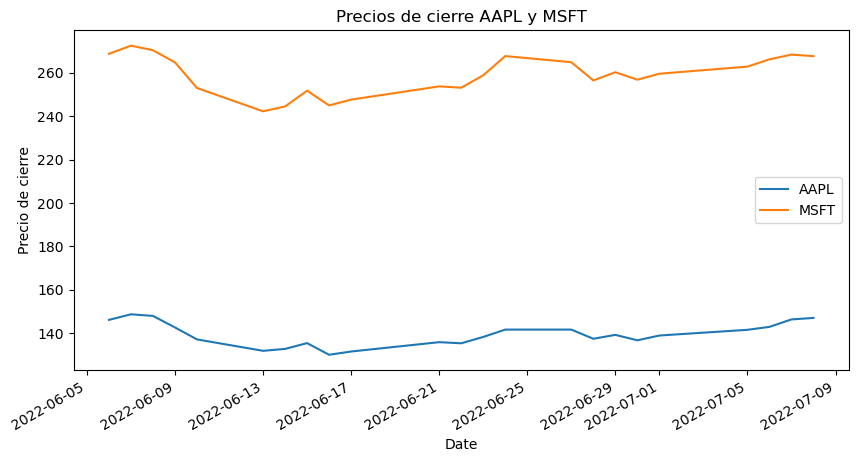

In [5]:
# Graficar serie de tiempo
prices.plot(figsize=(10,5))
plt.ylabel('Precio de cierre')
plt.title('Precios de cierre AAPL y MSFT')

In [6]:
# Dividir datos en entrenamiento y prueba
train = prices.iloc[:-10,:]
test = prices.iloc[-10:,:]

In [7]:
# Entrenar modelo VAR
model = sm.tsa.VAR(train)
results = model.fit(maxlags=2, ic='aic')

C:\Users\Statick\.conda\envs\course\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [8]:
# Realizar pronósticos
lag_order = results.k_ar
pred = results.forecast(train.values[-lag_order:], len(test))

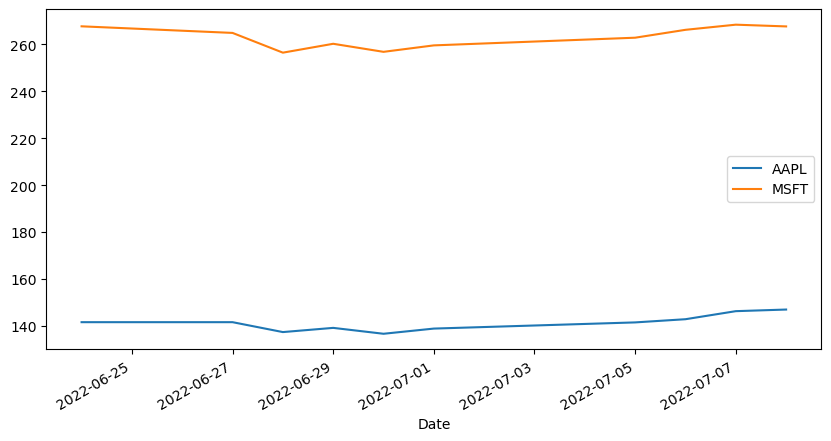

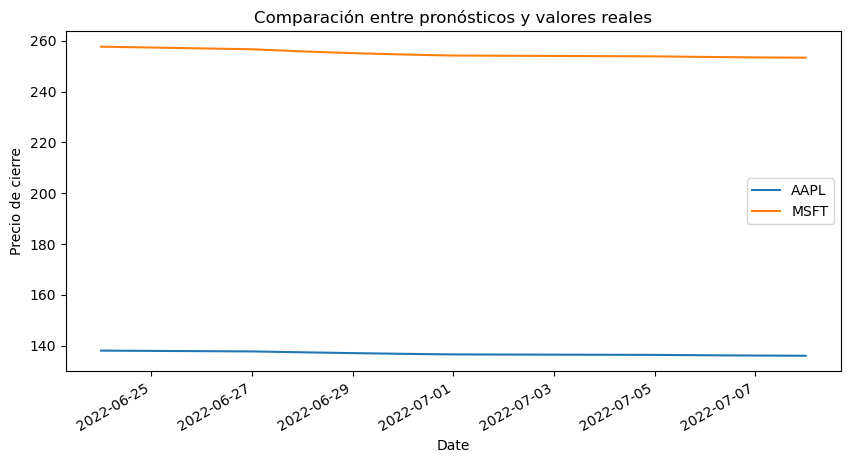

In [9]:
# Comparar pronósticos con valores reales y visualizar resultados
pred_df = pd.DataFrame(pred, index=test.index, columns=['AAPL_pred', 'MSFT_pred'])
test.plot(figsize=(10,5))
pred_df.plot(figsize=(10,5))
plt.ylabel('Precio de cierre')
plt.title('Comparación entre pronósticos y valores reales')
plt.legend(['AAPL', 'MSFT', 'AAPL_pred', 'MSFT_pred'])
plt.show()